<a href="https://colab.research.google.com/github/citaakml/hello-world/blob/main/Arrhythmia_fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

In [158]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data')
df.head()

,75,0,190,80,91,193,371,174,121,-16,...,0.0.38,9.0,-0.9,0.0.39,0.0.40,0.9.3,2.9.1,23.3,49.4,8
0,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
1,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
2,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
3,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
4,13,0,169,51,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Columns: 280 entries, 75 to 8
dtypes: float64(120), int64(155), object(5)
memory usage: 986.7+ KB


In [160]:
df.isna().sum()

75       0
0        0
190      0
80       0
91       0
        ..
0.9.3    0
2.9.1    0
23.3     0
49.4     0
8        0
Length: 280, dtype: int64

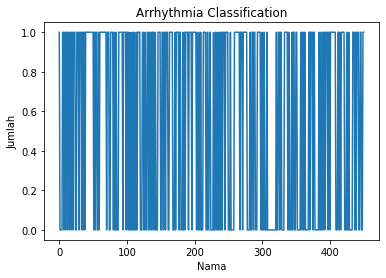

In [161]:
dataset = df.iloc[:, 1].values
plt.plot(dataset)
plt.xlabel('Nama')
plt.ylabel('Jumlah')
plt.title('Arrhythmia Classification')
plt.show()

In [162]:
dataset = dataset.reshape(-1,1)
dataset = dataset.astype('float32')
dataset.shape

(451, 1)

In [163]:
from sklearn.preprocessing import MinMaxScaler

In [164]:
scaler = MinMaxScaler(feature_range= (0,1))
dataset = scaler.fit_transform(dataset)

In [165]:
train_size = int(len(dataset)*0.5)
test_size = len(dataset)- train_size

train = dataset[0:train_size, :]
test = dataset[train_size:len(dataset), :]

print('train size: {}, test size: {}'.format(len(train), len(test)))

train size: 225, test size: 226


In [166]:
data_x = []
data_y = []
timestemp = 10

for i in range(len(train)- timestemp -1):
    a = train[i:(i+timestemp), 0]
    data_x.append(a)
    data_y.append(train[i + timestemp, 0])

    
x_train, y_train = np.array(data_x), np.array(data_y)

In [167]:
data_x = []
data_y = []
for i in range(len(test)- timestemp -1):
    a = test[i:(i+timestemp), 0]
    data_x.append(a)
    data_y.append(test[i + timestemp, 0])

    
x_test, y_test = np.array(data_x), np.array(data_y)

In [168]:
x_train.shape

(214, 10)

In [169]:
x_train = np.reshape(x_train, (x_train.shape[0],1,  x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0],1,  x_test.shape[1]))

In [170]:
x_train.shape

(214, 1, 10)

In [171]:
x_test.shape

(215, 1, 10)

Create LSTM Model

In [172]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error

In [174]:
# model -> rnn
rnn = Sequential()
rnn.add(LSTM(10, input_shape=(1, timestemp))) # 10 lstm neuron(block)
rnn.add(Dense(1))
rnn.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
rnn.fit(x_train, y_train, epochs=100, batch_size=1)

Epoch 1/100
214/214 [==============================] - 3s 2ms/step - loss: 0.3847 - accuracy: 0.4252
Epoch 2/100
214/214 [==============================] - 0s 2ms/step - loss: 0.2449 - accuracy: 0.5514
Epoch 3/100
214/214 [==============================] - 0s 2ms/step - loss: 0.2413 - accuracy: 0.5701
Epoch 4/100
214/214 [==============================] - 0s 2ms/step - loss: 0.2394 - accuracy: 0.5701
Epoch 5/100
214/214 [==============================] - 0s 2ms/step - loss: 0.2366 - accuracy: 0.6028
Epoch 6/100
214/214 [==============================] - 0s 2ms/step - loss: 0.2352 - accuracy: 0.6075
Epoch 7/100
214/214 [==============================] - 0s 2ms/step - loss: 0.2339 - accuracy: 0.6121
Epoch 8/100
214/214 [==============================] - 0s 2ms/step - loss: 0.2341 - accuracy: 0.6121
Epoch 9/100
214/214 [==============================] - 1s 5ms/step - loss: 0.2301 - accuracy: 0.6355
Epoch 10/100
214/214 [==============================] - 1s 3ms/step - loss: 0.2319 - accura

In [175]:
rnn.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 10)                840       
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 851
Trainable params: 851
Non-trainable params: 0
_________________________________________________________________


Prediction

In [176]:
#make predictions
train_predict = rnn.predict(x_train)
test_predict = rnn.predict(x_test)

# invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

import math
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[0], train_predict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

7/7 [==============================] - 0s 2ms/step
Train Score: 0.42 RMSE
Test Score: 0.61 RMSE


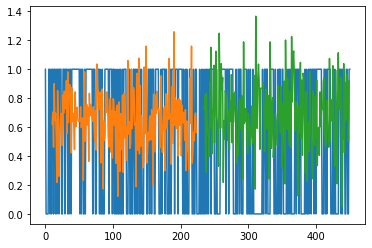

In [177]:
# shifting train
train_predictPlot = np.empty_like(dataset)
train_predictPlot[:, :] = np.nan
train_predictPlot[timestemp:len(train_predict)+timestemp, :] = train_predict

# shifting test predictions for plotting
test_predictPlot = np.empty_like(dataset)
test_predictPlot[:, :] = np.nan
test_predictPlot[len(train_predict)+(timestemp*2)+1:len(dataset)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(train_predictPlot)
plt.plot(test_predictPlot)
plt.show()